In [2]:
import numpy as np
import pandas as pd

# Estableciendo la semilla para reproducibilidad
np.random.seed(0)

# Número de observaciones (ejemplo: número de zonas en una ciudad)
n_observaciones = 100

# Generando datos simulados
# Variables sociodemográficas
nivel_socioeconomico = np.random.choice(['bajo', 'medio', 'alto'], n_observaciones)
densidad_poblacional = np.random.normal(1000, 200, n_observaciones)  # por km2
nivel_instruccion = np.random.choice(['baja', 'media', 'alta'], n_observaciones)

# Variables atmosféricas
temperatura = np.random.normal(25, 5, n_observaciones)  # grados Celsius
precipitacion = np.random.normal(100, 20, n_observaciones)  # mm de lluvia

# Casos de COVID-19 simulados usando una distribución de Poisson
# Asumiendo un promedio de 10 casos por zona
casos_covid = np.random.poisson(10, n_observaciones)

# Creando el DataFrame
datos_simulados = pd.DataFrame({
    'Nivel Socioeconomico': nivel_socioeconomico,
    'Densidad Poblacional': densidad_poblacional,
    'Nivel de Instrucción': nivel_instruccion,
    'Temperatura': temperatura,
    'Precipitación': precipitacion,
    'Casos COVID': casos_covid
})

datos_simulados.head()


,Nivel Socioeconomico,Densidad Poblacional,Nivel de Instrucción,Temperatura,Precipitación,Casos COVID
0,bajo,862.682105,media,27.609939,85.609467,13
1,medio,1002.974663,media,30.986299,97.627678,8
2,bajo,924.866821,alta,23.087569,83.837679,5
3,medio,992.355273,baja,28.458310,85.621781,10
4,medio,1073.594895,media,26.769425,88.529122,5


In [6]:
# Primero, realizaremos una transformación logarítmica de la densidad poblacional y de la precipitación para reducir el sesgo.
# Transformación logarítmica para reducir el sesgo en las variables
datos_simulados['Log Densidad Poblacional'] = np.log(datos_simulados['Densidad Poblacional'] + 1) # +1 para evitar log(0)
datos_simulados['Log Precipitación'] = np.log(datos_simulados['Precipitación'] + 1)

# Actualizamos las variables independientes (X) para incluir las transformadas
X_transformada = datos_simulados[['Nivel Socioeconomico', 'Nivel de Instrucción', 
                                  'Temperatura', 'Log Densidad Poblacional', 'Log Precipitación']]

# Ajustamos el modelo de Poisson con las variables transformadas
modelo_poisson_transformado = PoissonRegressor(alpha=0.5, max_iter=1000)
modelo_poisson_transformado.fit(X_transformada, y)

# Coeficientes del modelo ajustado con transformación
coeficientes_transformados = pd.DataFrame({
    'Variable': X_transformada.columns,
    'Coeficiente': modelo_poisson_transformado.coef_
})

coeficientes_transformados



,Variable,Coeficiente
0,Nivel Socioeconomico,-0.022152
1,Nivel de Instrucción,0.015822
2,Temperatura,-0.028009
3,Log Densidad Poblacional,-0.004898
4,Log Precipitación,-0.025692


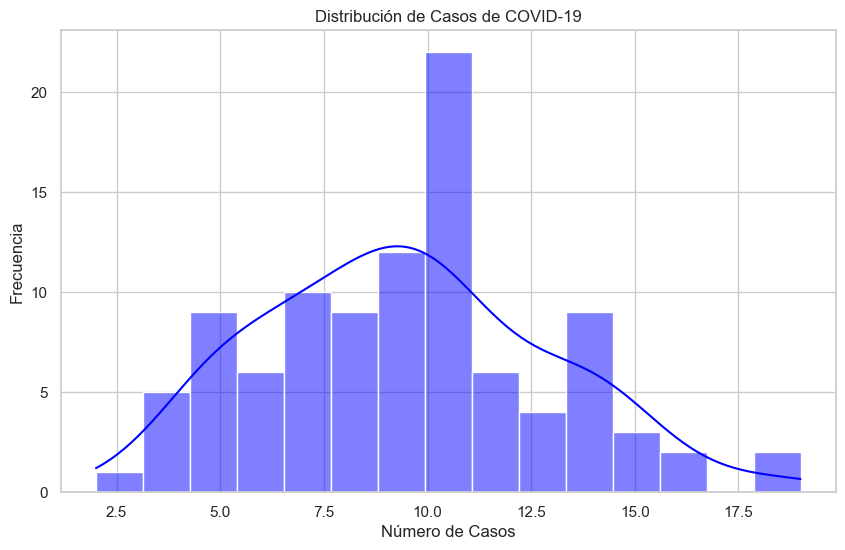

In [8]:
# Para graficar la distribución de los casos de COVID-19, utilizaremos un histograma.
# También intentaremos reflejar un enfoque similar al del artículo en términos de visualización.

plt.figure(figsize=(10, 6))

# Histograma de los casos de COVID-19
sns.histplot(datos_simulados['Casos COVID'], kde=True, bins=15, color='blue')
plt.title('Distribución de Casos de COVID-19')
plt.xlabel('Número de Casos')
plt.ylabel('Frecuencia')

plt.show()

# Nota: Dado que estamos trabajando con datos simulados, esta distribución no refleja datos reales.


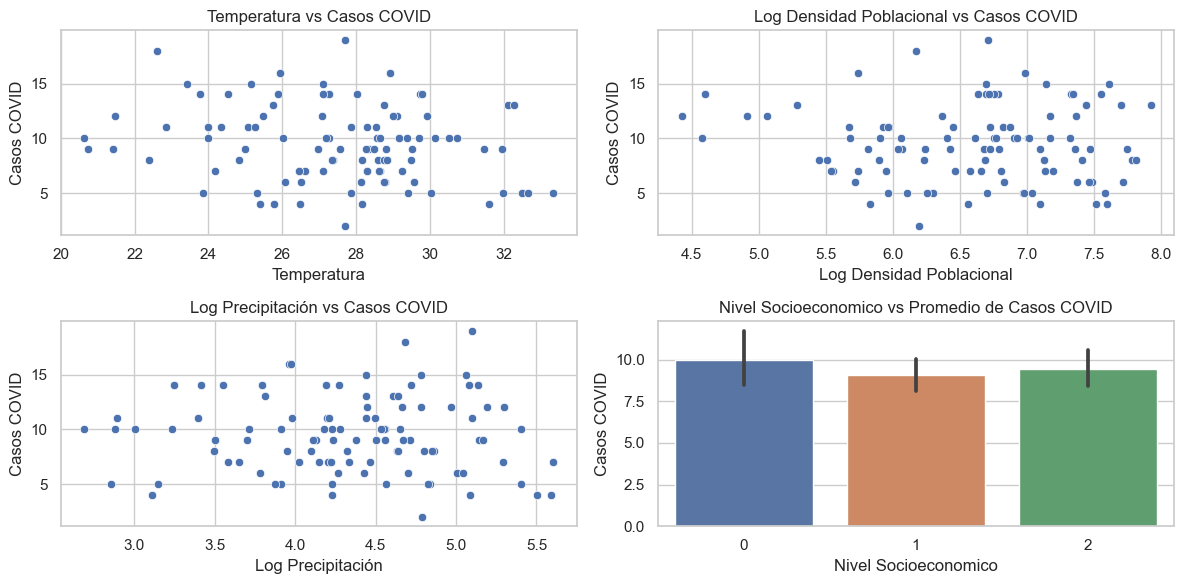

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del estilo de los gráficos
sns.set(style="whitegrid")

# Creando gráficos para visualizar las relaciones entre las variables y los casos de COVID-19

# Gráfico de dispersión para Temperatura vs Casos COVID
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.scatterplot(x='Temperatura', y='Casos COVID', data=datos_simulados)
plt.title('Temperatura vs Casos COVID')

# Gráfico de dispersión para Log Densidad Poblacional vs Casos COVID
plt.subplot(2, 2, 2)
sns.scatterplot(x='Log Densidad Poblacional', y='Casos COVID', data=datos_simulados)
plt.title('Log Densidad Poblacional vs Casos COVID')

# Gráfico de dispersión para Log Precipitación vs Casos COVID
plt.subplot(2, 2, 3)
sns.scatterplot(x='Log Precipitación', y='Casos COVID', data=datos_simulados)
plt.title('Log Precipitación vs Casos COVID')

# Gráfico de barras para Nivel Socioeconómico vs Promedio de Casos COVID
plt.subplot(2, 2, 4)
sns.barplot(x='Nivel Socioeconomico', y='Casos COVID', data=datos_simulados)
plt.title('Nivel Socioeconomico vs Promedio de Casos COVID')

plt.tight_layout()
plt.show()


In [9]:
# Simulando datos de coordenadas geográficas para cada observación
# Estos datos son completamente ficticios y solo para propósitos de demostración

np.random.seed(0)  # Para reproducibilidad

# Generando coordenadas aleatorias que podrían representar diferentes zonas de una ciudad
latitudes = np.random.uniform(-2.1700, -2.1900, n_observaciones)  # Ejemplo de rango de latitudes
longitudes = np.random.uniform(-79.9000, -79.9200, n_observaciones)  # Ejemplo de rango de longitudes

# Añadiendo estas coordenadas al DataFrame
datos_simulados['Latitud'] = latitudes
datos_simulados['Longitud'] = longitudes

# Muestra de los datos con las coordenadas geográficas
datos_simulados[['Latitud', 'Longitud', 'Casos COVID']].head()


,Latitud,Longitud,Casos COVID
0,-2.180976,-79.913556,13
1,-2.184304,-79.905400,8
2,-2.182055,-79.914704,5
3,-2.180898,-79.919244,10
4,-2.178473,-79.904975,5


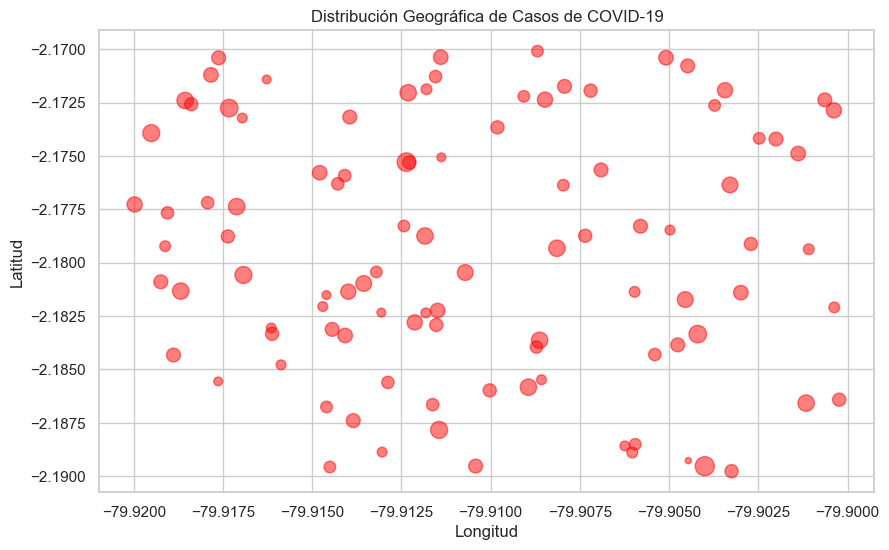

In [11]:
import matplotlib.pyplot as plt

# Creando un gráfico simple para visualizar los casos de COVID-19 georreferenciados

plt.figure(figsize=(10, 6))

# Dibujando los puntos con la latitud y longitud, y usando el número de casos como tamaño del punto
tamaños = datos_simulados['Casos COVID'] * 10  # Aumentando el tamaño para mejor visualización
plt.scatter(datos_simulados['Longitud'], datos_simulados['Latitud'], s=tamaños, color='red', alpha=0.5)

plt.title('Distribución Geográfica de Casos de COVID-19')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)

plt.show()


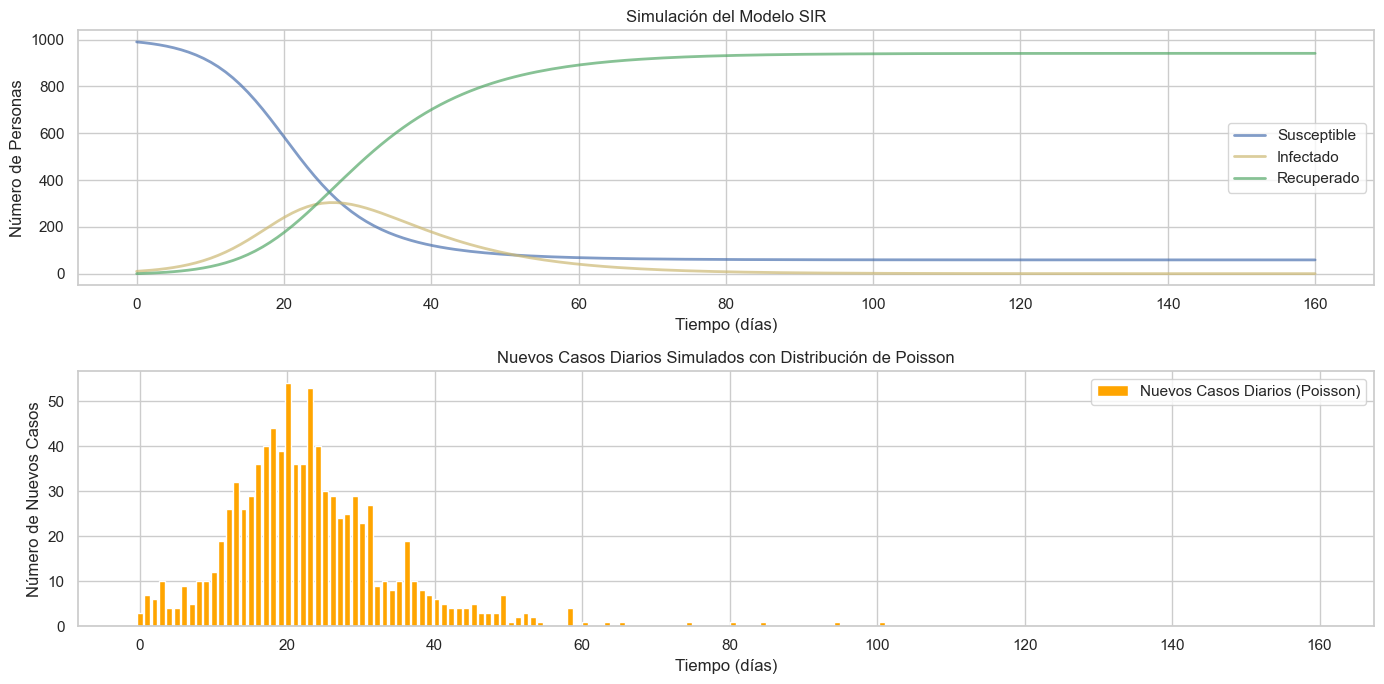

In [14]:
from scipy.integrate import odeint

# Parámetros del modelo SIR
beta = 0.3  # Tasa de transmisión (probabilidad de transmisión por contacto)
gamma = 0.1  # Tasa de recuperación (1/duración de la infección)

# Condiciones iniciales
S0 = 990  # Población susceptible inicial
I0 = 10   # Población infectada inicial
R0 = 0    # Población recuperada inicial
N = S0 + I0 + R0  # Población total

# Ecuaciones diferenciales del modelo SIR
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Vector de condiciones iniciales
y0 = S0, I0, R0

# Grid de puntos de tiempo (en días)
t = np.linspace(0, 160, 160)

# Integración de las ecuaciones SIR en el grid de tiempo
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Simulación de nuevos casos diarios usando distribución de Poisson
# Los nuevos casos diarios son aproximadamente beta * S * I / N
nuevos_casos = beta * S[:-1] * I[:-1] / N
nuevos_casos_poisson = np.random.poisson(nuevos_casos)

# Gráfico de los resultados
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
plt.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infectado')
plt.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recuperado')
plt.xlabel('Tiempo (días)')
plt.ylabel('Número de Personas')
plt.title('Simulación del Modelo SIR')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(t[:-1], nuevos_casos_poisson, color='orange', label='Nuevos Casos Diarios (Poisson)')
plt.xlabel('Tiempo (días)')
plt.ylabel('Número de Nuevos Casos')
plt.title('Nuevos Casos Diarios Simulados con Distribución de Poisson')
plt.legend()

plt.tight_layout()
plt.show()
